In [1]:
#!pip install pandas
#!pip install numpy
#!pip install wordcloud
import pandas as pd
import numpy as np

In [2]:
truenews = pd.read_csv('C:\\Users\\windos\\Desktop\\fakenews\\true.csv')
fakenews = pd.read_csv('C:\\Users\\windos\\Desktop\\fakenews\\fake.csv')

In [3]:
fakenews.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fakenews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [6]:
truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
#Data Cleaning
from nltk.corpus import stopwords
import string

In [8]:
def process_text(s):

    # Check string to see if they are a punctuation
    nopunc = [char for char in s if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert string to lowercase and remove stopwords
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [9]:
# Tokenize the text :Convert the normal text strings in to a list of tokens (words that we actually want)
#rerun, takes LOOOONG
truenews['True/Fake']='True'
fakenews['True/Fake']='Fake'
# Combine the 2 DataFrames into a single data frame
news = pd.concat([truenews, fakenews])
news["Article"] = news["title"] + news["text"]
news.sample(frac = 1) #Shuffle 100%


,title,text,subject,date,True/Fake,Article
1884,WATCH: Adam Schiff Double Dog Dares White Hou...,"Rep. Adam Schiff, the ranking Democrat on the ...",News,"April 5, 2017",Fake,WATCH: Adam Schiff Double Dog Dares White Hou...
605,Melania Gives Up On Cyberbullying After Trump...,As her husband Donald Trump makes Twitter thre...,News,"August 9, 2017",Fake,Melania Gives Up On Cyberbullying After Trump...
14671,GA TOWN MANDATES GUN OWNERSHIP: Here’s What Ha...,The results of this town s gun ownership manda...,politics,"Jan 11, 2016",Fake,GA TOWN MANDATES GUN OWNERSHIP: Here’s What Ha...
17717,WOW! POPULAR IMAM WARNED NYC Mayor DeBlasio Of...,Imam Tawhidi is an outspoken voice in the Musl...,left-news,"Oct 31, 2017",Fake,WOW! POPULAR IMAM WARNED NYC Mayor DeBlasio Of...
16081,Chile's Pinera says spending plan would cost $...,SANTIAGO (Reuters) - Chile s frontrunning cent...,worldnews,"October 30, 2017",True,Chile's Pinera says spending plan would cost $...
...,...,...,...,...,...,...
2512,EU warns U.S. it may respond swiftly to counte...,BRUSSELS (Reuters) - The European Union warned...,politicsNews,"July 26, 2017",True,EU warns U.S. it may respond swiftly to counte...
12515,"Thai PM says no trade with North Korea, ahead ...",BANGKOK (Reuters) - No trade takes place betwe...,worldnews,"December 12, 2017",True,"Thai PM says no trade with North Korea, ahead ..."
5190,Republican Issa joins bipartisan House caucus ...,NEW YORK (Reuters) - U.S. Republican Represent...,politicsNews,"March 2, 2017",True,Republican Issa joins bipartisan House caucus ...
3466,Dear America: We Tried To Warn You,We tried to warn you.From the summer of 2016 o...,News,"December 10, 2016",Fake,Dear America: We Tried To Warn YouWe tried to...


In [10]:
news['Clean Text'] = news['Article']

In [11]:
print(news['Clean Text'])

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: Clean Text, Length: 44898, dtype: object


In [12]:
news.describe()

,title,text,subject,date,True/Fake,Article,Clean Text
count,44898,44898,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2,39105,39105
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake,Highlights: The Trump presidency on April 13 a...,Highlights: The Trump presidency on April 13 a...
freq,14,627,11272,182,23481,8,8


In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\windos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.stem.porter import PorterStemmer

stem_words = PorterStemmer()
#!pip install wordcloud

In [15]:
def stemming(data):
    stemmed_content = re.sub('[^a-zA-Z]',' ',data)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem_words.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\windos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


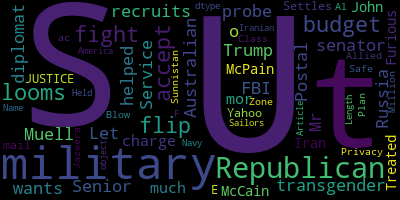

In [16]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(STOPWORDS)
mask=np.array(Image.open("cloud.png"))
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=3000, 
                        random_state=42)
wordcloud.generate(str(news["Article"]))
wordcloud.to_file("wc.png")
path="wc.png"
display(Image.open(path))
print(wordcloud)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\windos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


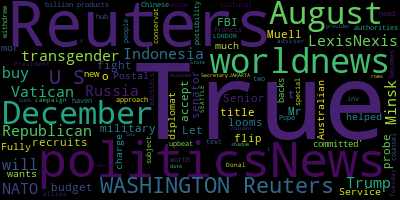

In [17]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(STOPWORDS)
mask=np.array(Image.open("cloud.png"))
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=3000, 
                        random_state=42)
wordcloud.generate(str(truenews))
wordcloud.to_file("wc.png")
path="wc.png"
display(Image.open(path))
print(wordcloud)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\windos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


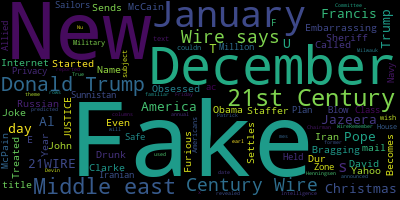

In [18]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(STOPWORDS)
mask=np.array(Image.open("cloud.png"))
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=3000, 
                        random_state=42)
wordcloud.generate(str(fakenews))
wordcloud.to_file("wc.png")
path="wc.png"
display(Image.open(path))
print(wordcloud)